Full bytes with CRC:
0x8d 0x40 0x6b 0x90 0x20 0x15 0xa6 0x78 0xd4 0xd2 0x20 0xaa 0x4b 0xda 

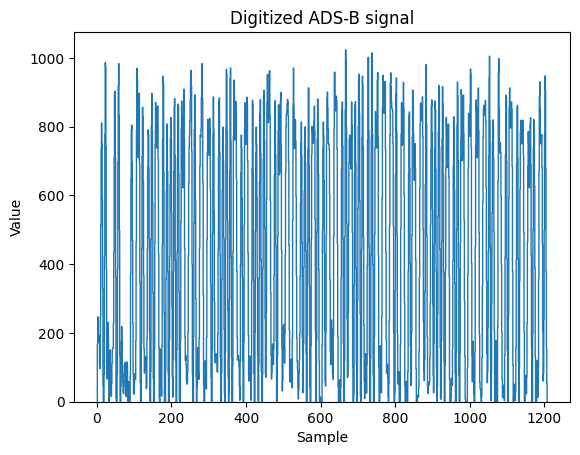

In [2]:
import os
import matplotlib.pyplot as plt
from M_Functions.signal_generator import *
from M_Functions.crc import *

#Configuration
amplitude = 1
data_bits = bytes([0x8D, 0x40, 0x6B, 0x90, 0x20, 0x15, 0xA6, 0x78, 0xD4, 0xD2, 0x20])

#Generate and append CRC
crc_bits = generate_adsb_crc(data_bits)
full_bits = data_bits + crc_bits
print("Full bytes with CRC:")
for i in full_bits:
    print(hex(i) + " ", end='')

#Generate and plot simulated ADS-B
ideal_signal, filtered_signal, noisy_signal = generate_ADSB(amplitude, full_bits)

#Digitize signal
digitized_signal, digitized_t = digitize_signal(noisy_signal, 100E6, 10E6, 1.4, 2**10)

plt.stairs(digitized_signal, baseline=None)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Digitized ADS-B signal')
plt.show()

#Write genrated data into two files:
#1. Function generator format
#2. LT spice voltage source simulator format
directory = "test_signals_generated"
function_generator_file_path = os.path.join(directory, "testVoltage.txt")
lt_spice_simulator_file_path = os.path.join(directory, "testVoltageLTspice.txt")

function_generator_file = open(function_generator_file_path, 'w')
lt_spice_file = open(lt_spice_simulator_file_path, 'w')

for i in range(len(digitized_signal)):
    write_value = digitized_signal[i]
    function_generator_file.write(str(int(write_value)) + '\n')
    lt_spice_file.write("{:.8f}".format(i * 10E-8) + " " + str(write_value) + '\n')

function_generator_file.close()
lt_spice_file.close()